In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data and dropping Median Income
data = pd.read_csv(r"C:\Users\pminh\OneDrive\Documents\Classes\Fall 24\STA160 DATA\merged_output_cleaned.csv")
data = data[data['City'] != 'Los Angeles']
data = data[data['City'] != 'Long Beach']
data_numeric = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Median Income'])

C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

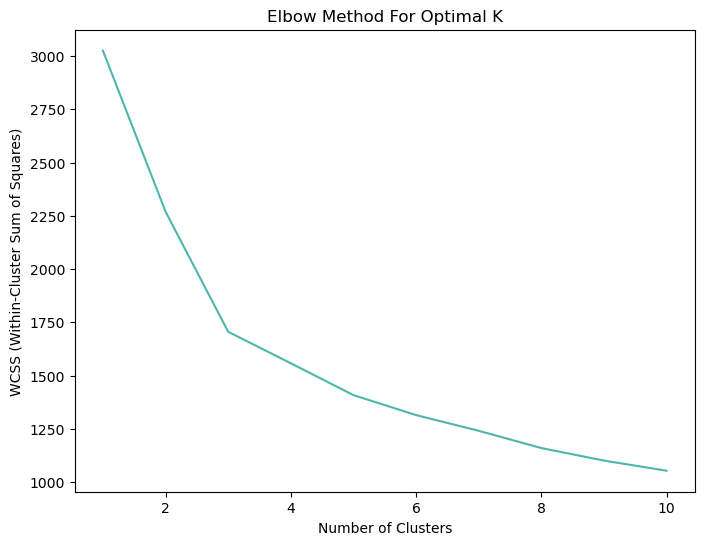

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Elbow Method to determine optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=20, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to determine the best K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, color="#4db6ac")
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Based on the elbow graph, choose the optimal K
optimal_k = 3

# Perform K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=20, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to your dataset
data['Cluster'] = clusters

# Display the first few rows with the cluster assignments
data

C:\Users\pminh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,City,Median Income,Tax Rate %,Average Household Size,Households With Children Under 18,Co-habiting Couple Households,Female only Households,Male Only Households,Unemployed Rate (%),Grade 9-12,...,0-15 (%),15-17 (%),18-24 (%),25-34 (%),55-64 (%),65+ (%),25 to 34,55 to 64,65 plus,Cluster
2,Santa Clarita,116186,9.50,3.05,25921,3920,15755,9915,5.6,6706,...,20.95,4.46,8.53,12.64,12.51,12.41,28553,28265,28022,0
3,Glendale,81219,10.25,2.63,18320,3790,21406,13144,5.8,6696,...,14.74,3.28,7.71,15.88,13.02,18.44,30892,25320,35862,0
4,Lancaster,103816,10.25,3.16,18374,3143,16320,8737,8.2,9864,...,23.07,4.74,9.51,14.42,11.45,11.23,24731,19633,19249,0
5,Palmdale,78414,10.25,3.58,18040,3107,12008,6454,8.1,11741,...,23.79,5.16,10.08,13.79,11.34,10.43,23010,18932,17408,0
6,Pomona,73515,10.25,3.50,13200,3524,11270,6470,6.5,12253,...,19.76,4.52,12.13,14.41,10.67,12.16,21586,15986,18226,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Littlerock,68194,9.50,3.98,145,57,95,44,10.1,65,...,29.56,2.98,16.70,9.28,15.31,4.64,140,231,70,2
119,Irwindale,101181,10.25,3.03,101,14,159,96,5.4,101,...,15.86,4.39,10.28,22.41,7.67,18.32,301,103,246,2
120,Bradbury,158438,9.50,2.77,58,9,44,17,8.9,21,...,10.95,0.78,8.21,8.34,26.73,18.77,64,205,144,1
121,Industry,77000,9.50,3.60,22,5,14,13,6.6,21,...,31.62,0.00,5.13,20.94,3.85,17.95,49,9,42,2


In [15]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled, clusters)

# Display silhouette score and cluster distribution
silhouette_avg, data['Cluster'].value_counts()

(0.26178109383140236,
 Cluster
 1    56
 2    40
 0    25
 Name: count, dtype: int64)

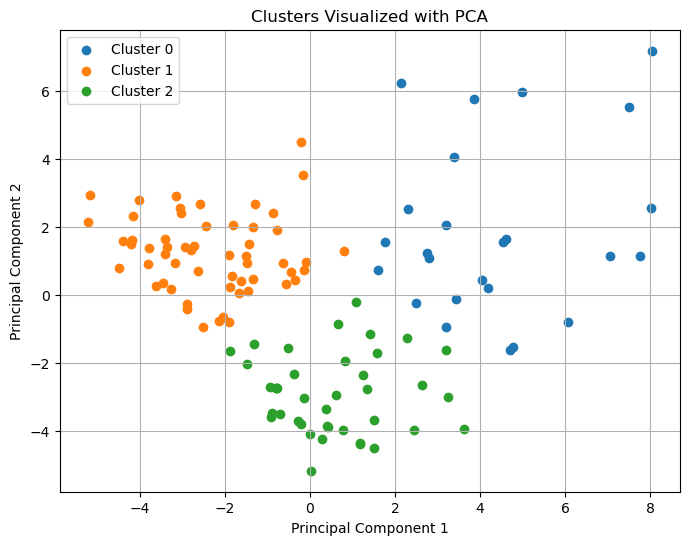

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Create a scatter plot for the clusters
plt.figure(figsize=(8, 6))
for cluster in set(clusters):
    cluster_points = pca_components[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
k_means_data = data  # Assuming the clustering results are stored in 'data'
k_means_data.to_csv('k_means_data_3G.csv', index=False)